In [11]:
# POPULATION ANALYSIS - NAIVE population analysis, regulation!

# import list
%reload_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import main_funcs as mfun
import utils_funcs as utils
import plot_funcs as pfun
import matplotlib.pyplot as plt
import pickle
from scipy import stats
from itertools import compress
import seaborn as sns
from sklearn import preprocessing
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import warnings
from scipy.cluster.hierarchy import linkage, leaves_list
from sklearn.decomposition import PCA

warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore", category= FutureWarning) 
warnings.filterwarnings("ignore", category= DeprecationWarning)
warnings.filterwarnings("ignore", category= UserWarning)


#paths
savefigpath  =  r'G:\My Drive\Manuscripts\0 CLAStPFC\panels_raw2'
#'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\figs\\'
analysispath = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\'



Env: clapfcstimulation
Env: clapfcstimulation


Env: clapfcstimulation
Env: clapfcstimulation
Env: clapfcstimulation
Stats for Sensory
KS test for Visual and Visual + Opto t stat = 0.2300310197751066; p: 2.1013827127233415e-236
CV p=2.4805966312328442e-148
DTW p=1.3540412415245642e-69
Stats for Opto
KS test for Visual and Visual + Opto t stat = 0.032028156621205506; p: 0.1921760117929901
CV p=2.333220379193448e-131
DTW p=0.0
Stats for Opto-boosted
KS test for Visual and Visual + Opto t stat = 0.30251551780463903; p: 8.656512254613261e-244
CV p=2.1937323997733035e-73
DTW p=0.0


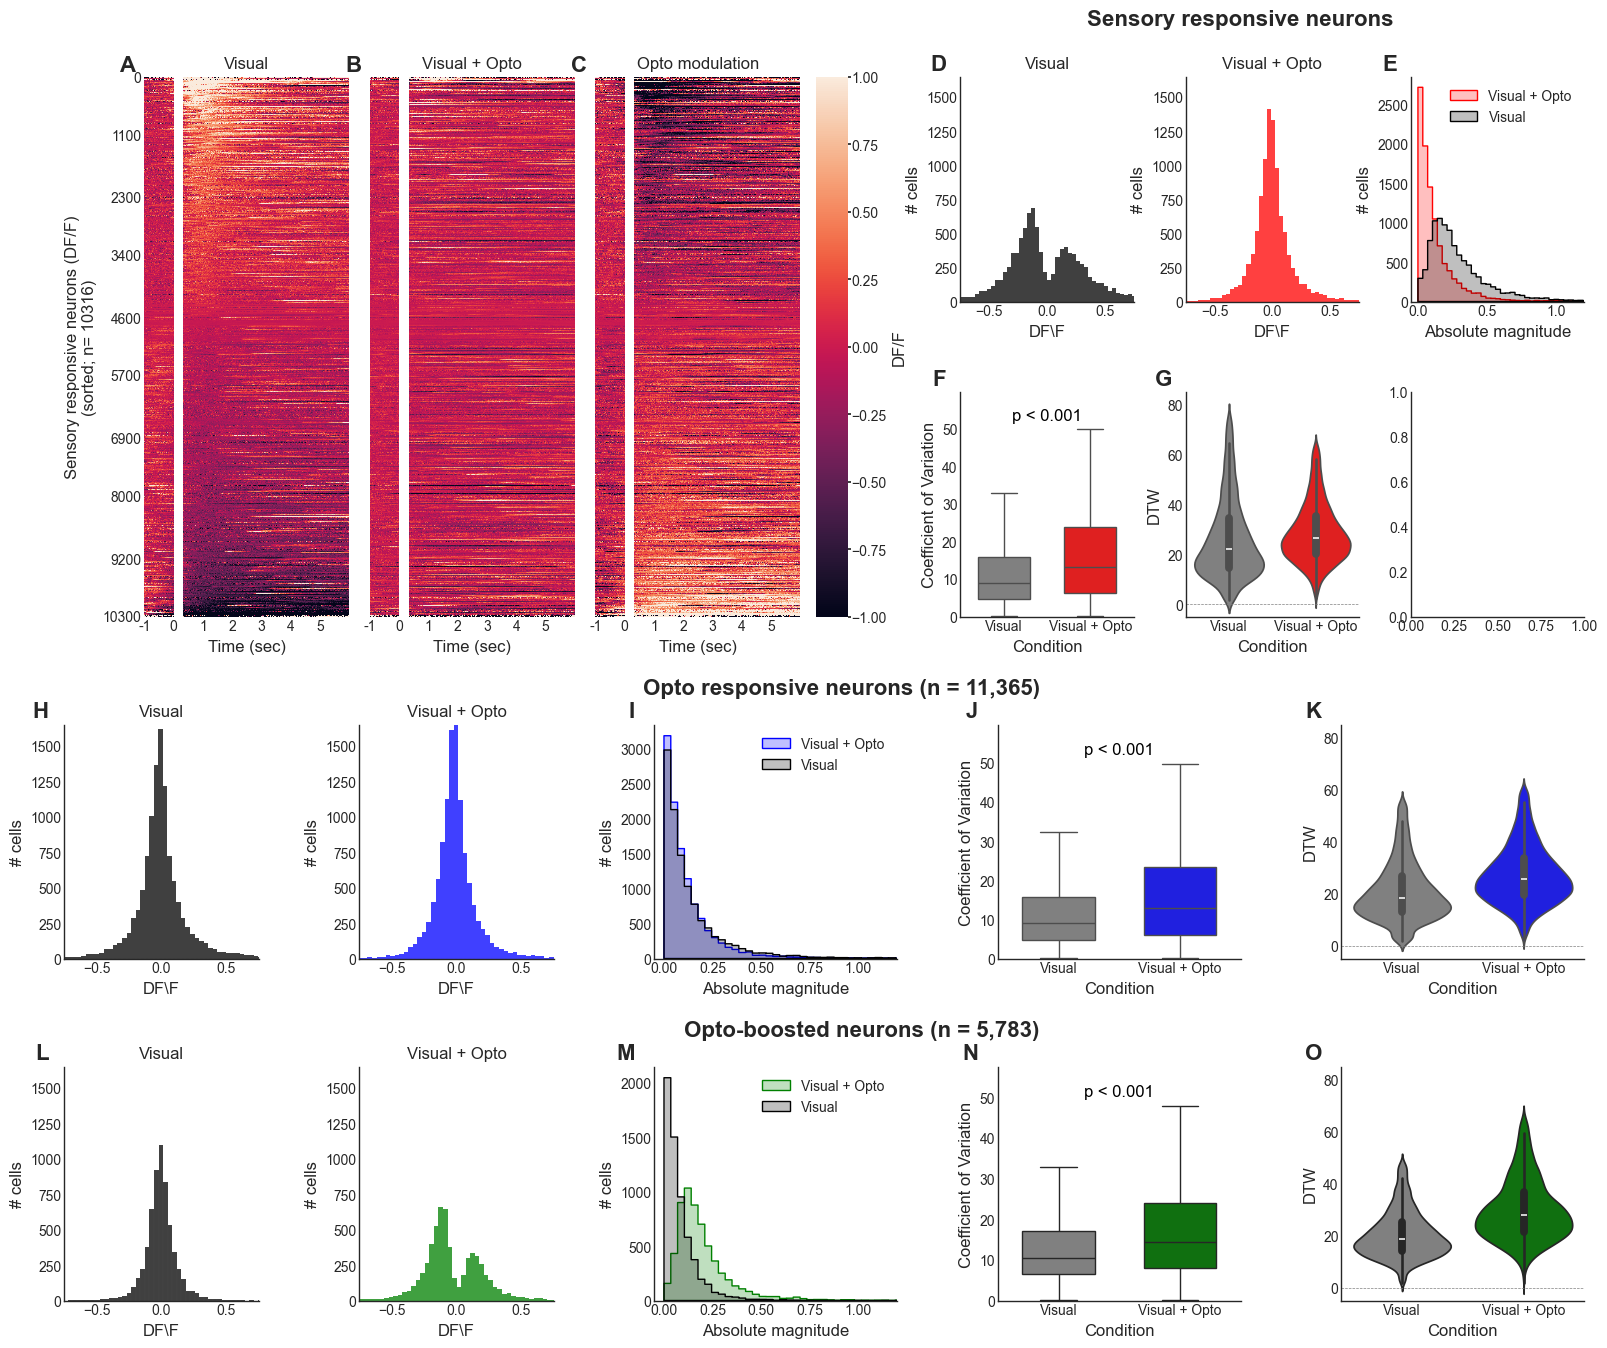

In [23]:
# Figure 2 : Chrimson mice - Naive population analysis Increase variance in response

interestedCohort = 'Chrimson'
interestedTrainedLevel = 'Naive'

pfun.set_figure()
fig = plt.figure(constrained_layout=False, figsize=(16, 18)) # 8,11 for full A4 page
# figsize=(6.85, 9.05)) for full page # figsize=(3.35, 9.05)) for single page

# set gridspec
gs_visHeatmap  = fig.add_gridspec(ncols=3, nrows=1, bottom=0.65, top=0.95, left=0.05,right=0.46,
                              wspace=0.1, hspace=0.2)
gs_visHeatmapCax  = fig.add_gridspec(ncols=1, nrows=1, bottom=0.65, top=0.95, left=0.48, right=0.50,
                              wspace=0.2, hspace=0.4)
gs_visuaPlots  = fig.add_gridspec(ncols=3, nrows=2, bottom=0.65, top=0.95, left=0.56, right=0.95,
                              wspace=0.3, hspace=0.4)
gs_optoPlots   = fig.add_gridspec(ncols=5, nrows=1, bottom=0.46, top=0.59, left=0.0, right=0.95,
                             width_ratios=[0.8, 0.8, 1, 1, 1], wspace=0.45, hspace=0.4)
gs_bothPlots   = fig.add_gridspec(ncols=5, nrows=1, bottom=0.27, top=0.40, left=0.0, right=0.95,
                             width_ratios=[0.8, 0.8, 1, 1, 1], wspace=0.45, hspace=0.4)

# Panel A: Heatmap for Visual responsive cells
ax_gs_visHeatmap = {xx: fig.add_subplot(gs_visHeatmap[xx]) for xx in range(3)}
cax =  {xx: fig.add_subplot(gs_visHeatmapCax[xx]) for xx in range(1)} 
colorbarlimitsForHeatMap = [-1,1] 
pfun.heatmap_comparison('Visual', 'Visual + Opto', sortType = 'Visual', cohort=interestedCohort, 
                       trainedLevel= interestedTrainedLevel, condition='Sensory',
                       colormapSelection = 'OptoProject', axis=ax_gs_visHeatmap, cbar_ax=cax[0], 
                       savefigname=None, savefigpath=None, colorbarlimits=colorbarlimitsForHeatMap)

# Panel B-G: Visual responsive cells analysis
plotParams = {
    'ylimitsforhist': [0, 1650],
    'xlimitsforhist': [-0.75, 0.75],
    'analysis_time': 1500,  # in ms
    'colorbarlimitsForHeatMap': [-1, 1],
    'scatterplotlimits': [-4.5, 4.5],
    'ylimitsforECDF': [0.5, 1.05],
    'xlimitsforABS': [-0.05, 1.2],
    'ylimitsforCV': [0.1, 0.15],
    'faceColors': ['black','red'],
     }

total_num_axis = gs_visuaPlots.get_geometry()[0]* gs_visuaPlots.get_geometry()[1]
ax_gs_visuaPlots = {xx: fig.add_subplot(gs_visuaPlots[xx]) for xx in range(total_num_axis)}
pfun.population_plots('Visual', 'Visual + Opto', sortType = 'Visual', cohort=interestedCohort, 
                       trainedLevel=interestedTrainedLevel, condition='Sensory', plotParams = plotParams,
                       axisAll=ax_gs_visuaPlots, savefigname=None, savefigpath=None)

# Panel: Opto responsive cells analysis
total_num_axis = gs_optoPlots.get_geometry()[0]* gs_optoPlots.get_geometry()[1]
ax_gs_optoPlots = {xx: fig.add_subplot(gs_optoPlots[xx]) for xx in range(total_num_axis)}
plotParams['faceColors'] = ['black', 'blue']
pfun.population_plots('Visual', 'Visual + Opto', sortType = 'Visual', cohort=interestedCohort, 
                       trainedLevel=interestedTrainedLevel, condition='Opto', plotParams = plotParams,
                       axisAll=ax_gs_optoPlots, savefigname=None, savefigpath=None)

# Panel: OptoBoosted responsive cells analysis
total_num_axis = gs_bothPlots.get_geometry()[0]* gs_bothPlots.get_geometry()[1]
ax_gs_bothPlots = {xx: fig.add_subplot(gs_bothPlots[xx]) for xx in range(total_num_axis)}
plotParams['faceColors'] = ['black', 'green']
pfun.population_plots('Visual', 'Visual + Opto', sortType = 'Visual', cohort=interestedCohort, 
                       trainedLevel=interestedTrainedLevel, condition='Opto-boosted', plotParams = plotParams,
                       axisAll=ax_gs_bothPlots, savefigname=None, savefigpath=None)

# Lets add the labels
axes = [ax_gs_visHeatmap, ax_gs_visuaPlots, ax_gs_optoPlots, ax_gs_bothPlots]
labels = ['A','B','C','D','','E','F','G','','H','','I','J','K','L','','M','N','O','P',
          'Q','R','S','T','U','V','W','X','Y','','Z']
lInd = 0
skip_indices = [68, 70, 75]
for ax, label in zip(axes, labels):
    for key in ax:
        # if 8/10/15, do not add the label
        if lInd not in skip_indices:
            if lInd<3:
                ax[key].text(-0.04, 1.04, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                            fontweight='bold', va='top', ha='right',
                            bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
            elif lInd>2:
                ax[key].text(-0.08, 1.1, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                            fontweight='bold', va='top', ha='right',
                            bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
            else:
                ax[key].text(-0.04, 1.04, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                            fontweight='bold', va='top', ha='right',
                            bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        lInd += 1

# Add some text in the figure  
axes[1][1].text(2.5, 1.3, 'Sensory responsive neurons', transform=axes[1][0].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
              
axes[2][1].text(3.5, 1.2, 'Opto responsive neurons (n = 11,365)', transform=axes[2][1].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))

axes[3][1].text(3.5, 1.2, 'Opto-boosted neurons (n = 5,783)', transform=axes[3][1].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))

        
plt.tight_layout()
savefigname = 'Figure2_Chrimson_NaivePopulationAnalysisRaw'
pfun.save_figure(savefigname,savefigpath)
#plt.close()


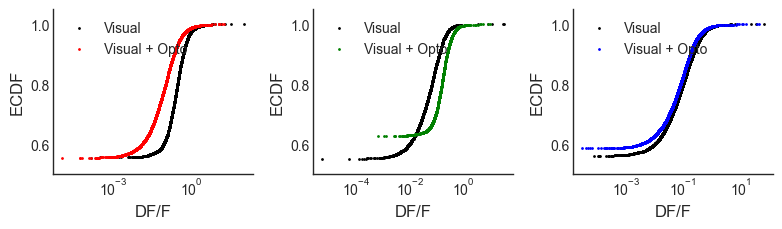

In [16]:
# supplementary figure 2: ECDF plots across different subpopulation
pfun.set_figure()
fig = plt.figure(constrained_layout=False, figsize=(8, 11)) # 8,11 for full A4 page
gs_ecdfPlots   = fig.add_gridspec(ncols=3, nrows=1, bottom=0.05, top=0.20, left=0.05, right=0.95,
                               wspace=0.3, hspace=0.3)


interestedCohort = 'Chrimson'
interestedTrainedLevel = 'Naive'

plotParams = {
    'ylimitsforhist': [0, 1650],
    'xlimitsforhist': [-0.75, 0.75],
    'analysis_time': 1500,  # in ms
    'colorbarlimitsForHeatMap': [-1, 1],
    'scatterplotlimits': [-4.5, 4.5],
    'ylimitsforECDF': [0.5, 1.05],
    'xlimitsforABS': [-0.05, 1.2],
    'ylimitsforCV': [0.1, 0.15],
    'faceColors': ['black','red'],
     }


total_num_axis = gs_ecdfPlots.get_geometry()[0]* gs_ecdfPlots.get_geometry()[1]
ax_gs_ecdfPlots = {xx: fig.add_subplot(gs_ecdfPlots[xx]) for xx in range(total_num_axis)}
plotParams['faceColors'] = ['black', 'red']
pfun.plot_ecdf('Visual', 'Visual + Opto', cohort=interestedCohort, 
                       trainedLevel=interestedTrainedLevel, condition='Sensory', 
                       plotParams = plotParams, ax= ax_gs_ecdfPlots[0] )

plotParams['faceColors'] = ['black', 'green']
pfun.plot_ecdf('Visual', 'Visual + Opto', cohort=interestedCohort, 
                       trainedLevel=interestedTrainedLevel, condition='Opto-boosted', 
                       plotParams = plotParams, ax= ax_gs_ecdfPlots[1] )

plotParams['faceColors'] = ['black', 'blue']
pfun.plot_ecdf('Visual', 'Visual + Opto', cohort=interestedCohort, 
                       trainedLevel=interestedTrainedLevel, condition='Opto', 
                       plotParams = plotParams, ax= ax_gs_ecdfPlots[2] )


plt.tight_layout()
savefigname = 'Figure2_suppECDF_Chrimson'
pfun.save_figure(savefigname,savefigpath)
            
